In [52]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [61]:
df_players = pd.read_csv('df_players.csv')

In [62]:
df_players.columns

Index(['Unnamed: 0', 'player_mlb_id', 'playerID_LAHMAN', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'weight', 'height', 'bats',
       ...
       'fielding_att', 'mean_ba_on_field_att', 'errors', 'mean_ba_on_errors',
       'field_pct', 'earned_runs', 'outs_recorded', 'inherited_runners',
       'innings_pitched', 'ERA'],
      dtype='object', length=146)

In [65]:
#[['player_mlb_id','year','total_pa', 'field_p', 'field_c', 'field_1b', 'field_2b', 'field_3b', 'field_ss', 'field_lf', 'field_cf', 'field_rf']]
df_players_fielding = df_players.copy()

In [67]:
df_players_fielding['check'] = df_players_fielding[['total_pa', 'field_p', 'field_c', 'field_1b', 'field_2b', 'field_3b', 'field_ss', 'field_lf', 'field_cf', 'field_rf']].sum(axis=1)
df_players_fielding['total_field'] = df_players_fielding[['field_p', 'field_c', 'field_1b', 'field_2b', 'field_3b', 'field_ss', 'field_lf', 'field_cf', 'field_rf']].sum(axis=1)

In [69]:
#remove players who didn't field at all
df_players_fielding = df_players_fielding[df_players_fielding['check'] > 0]


In [71]:
field_columns = ['field_p', 'field_c', 'field_1b', 'field_2b', 'field_3b', 'field_ss', 'field_lf', 'field_cf', 'field_rf']

for col in field_columns:
    df_players_fielding[f'{col}_ratio'] = df_players_fielding[col] / df_players_fielding['total_field']

In [73]:
ratio_columns = ['field_p_ratio', 'field_c_ratio', 'field_1b_ratio', 'field_2b_ratio', 
                 'field_3b_ratio', 'field_ss_ratio', 'field_lf_ratio', 'field_cf_ratio', 'field_rf_ratio']

df_players_fielding['primary_position'] = df_players_fielding[ratio_columns].idxmax(axis=1).str.replace('_ratio', '').str.replace('field_', '')

C:\Users\etien\AppData\Local\Temp\ipykernel_50100\275693659.py:4: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_players_fielding['primary_position'] = df_players_fielding[ratio_columns].idxmax(axis=1).str.replace('_ratio', '').str.replace('field_', '')


In [213]:
positions = df_players_fielding[['player_mlb_id','year','primary_position']]

In [215]:
df_players_update = df_players.merge(positions, on= ['player_mlb_id','year'], how='left')

In [219]:
df_players_update.to_csv('df_players_pos.csv')

In [76]:
df_players_fielding_100 = df_players_fielding[df_players_fielding['total_pa'] > 100]
df_players_fielding_100.groupby('primary_position')['ops'].mean()

primary_position
1b    0.737004
2b    0.685430
3b    0.702104
c     0.662734
cf    0.691294
lf    0.712863
p     0.934737
rf    0.729091
ss    0.684184
Name: ops, dtype: float64

In [78]:
#numbers are still off
df_players_fielding_100[df_players_fielding_100['primary_position'] == 'p']['ops']

1468    0.930153
3960    0.852243
6452    1.021815
Name: ops, dtype: float64

In [80]:
#set DHs to be when a player has a lot of PA but very little fielding

In [141]:
df_players_fielding.groupby(['primary_position','bats'])['total_pa'].mean()

primary_position  bats
1b                B       405.700000
                  L       300.030000
                  R       409.850575
2b                B       309.128205
                  L       328.928571
                  R       259.264463
3b                B       315.821429
                  L       320.666667
                  R       289.691275
c                 B       263.157895
                  L       137.022727
                  R       210.728889
cf                B       262.450000
                  L       261.610526
                  R       271.051724
lf                B       359.150000
                  L       289.938053
                  R       274.954545
p                 B         1.694444
                  L         5.440559
                  R         1.913945
rf                B       209.181818
                  L       252.037383
                  R       332.275510
ss                B       282.218750
                  L       291.571429
               

In [145]:
#check for only players above 50 PA
df_players_fielding[df_players_fielding['total_pa'] >= 50].groupby(['primary_position'])['total_pa'].mean()

primary_position
1b    386.642458
2b    333.446701
3b    345.598930
c     265.652361
cf    305.055276
lf    341.738916
p     114.774194
rf    340.805405
ss    394.393548
Name: total_pa, dtype: float64

In [159]:
#should calculate average

In [203]:
# Compute mean and standard deviation based on 100+ pa
df_players_fielding_50 = df_players_fielding[df_players_fielding['total_pa'] >= 100]

mean_ops = df_players_fielding_50['ops'].mean()
std_ops = df_players_fielding_50['ops'].std()

# Define bins based on standard deviations
bins = [-np.inf, mean_ops - 2*std_ops, mean_ops - std_ops, mean_ops, mean_ops + std_ops, mean_ops + 2*std_ops, np.inf]
labels = ['Very Low', 'Low', 'Below Average', 'Above Average', 'High', 'Very High']

# Apply binning
df_players_fielding_50['ops_bin'] = pd.cut(df_players_fielding_50['ops'], bins=bins, labels=labels)


C:\Users\etien\AppData\Local\Temp\ipykernel_50100\2418448499.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_fielding_50['ops_bin'] = pd.cut(df_players_fielding_50['ops'], bins=bins, labels=labels)


In [205]:
df_players_fielding_50.groupby(['primary_position'])['ops_bin'].value_counts()

primary_position  ops_bin      
1b                Above Average    67
                  Below Average    46
                  High             26
                  Low              10
                  Very High         9
                  Very Low          1
2b                Below Average    68
                  Above Average    56
                  Low              23
                  High             17
                  Very Low          2
                  Very High         1
3b                Above Average    65
                  Below Average    58
                  High             22
                  Low              14
                  Very Low          4
                  Very High         1
c                 Below Average    71
                  Above Average    56
                  Low              46
                  High             18
                  Very Low         10
                  Very High         1
cf                Below Average    63
                  

<Axes: ylabel='ops_bin'>

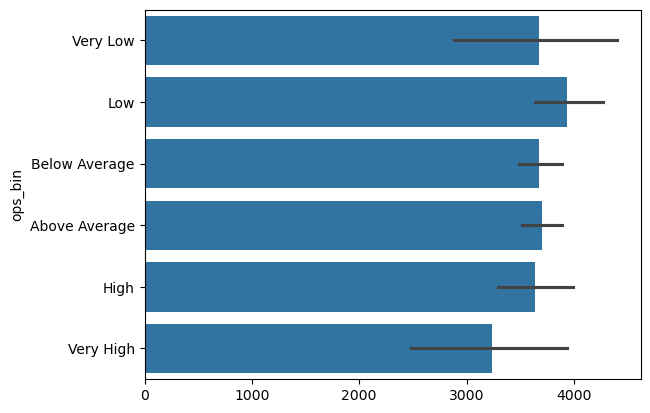

In [207]:
sns.barplot(df_players_fielding_50['ops_bin'])